# Keras Workshop 2

Machine Learning

Name: Rosalinda Muñoz Gámez

UASLP code: 303997

Gen 2021, Fac. Code: 202112300357

October 23th, 2024

#Introducción a las Redes Convolucionales (ConvNets, CNNs)

Objetivo:
En este ejercicio se implementará una red neuronal convolucional, incluyendo Dropout.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras import models
from keras import layers
from keras import optimizers
from keras.models import load_model
from keras.utils import to_categorical

from pandas import DataFrame
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# cargar la interfaz a la base de datos que viene con Keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Pre-procesamiento de los datos

In [3]:
# reshape y normalización
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

Ejercicio: Defina un modelo de red convolucional convNet, con tres capas convolucionales Conv2D. El número de filtros de esas capas es de su elección. Use un kernel_size = (3,3), y funciones de activación ReLU. (stride=1 y padding='valid')
Luego de cada capa convolucional, agregue una canpa Dropout, con una tasa de eliminación (rate) de 25%.
Añada capas convolucionales, capas MaxPooling2D. Use un pool_size = (2,2).
Posteriormente, agregue una capa Flatten a la red convolucional \texttt{convnet} anterior. Luego, agregue una capa oculta Dense con 64 neuronas, y una capa de salida Dense con 10 neuronas. Use funciones de activación ReLU (y softmax en la capa de salida).
Asegúrese que las capas tienen nombres distintos, e incluya el parámetro input_shape en la primer capa.

In [4]:
# Definir el modelo convNet según los requerimientos
convnet = models.Sequential()

# Primera capa Conv2D con Dropout
convnet.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1), name='conv1'))
convnet.add(layers.Dropout(rate=0.25, name='drop1'))

# Segunda capa Conv2D con Dropout
convnet.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='conv2'))
convnet.add(layers.Dropout(rate=0.25, name='drop2'))

# Tercera capa Conv2D con Dropout y MaxPooling
convnet.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='conv3'))
convnet.add(layers.Dropout(rate=0.25, name='drop3'))
convnet.add(layers.MaxPooling2D(pool_size=(2, 2), name='maxpool1'))

# Capa Flatten
convnet.add(layers.Flatten(name='flat1'))

# Capa oculta Dense con 64 neuronas
convnet.add(layers.Dense(64, activation='relu', name='dense1'))

# Capa de salida Dense con 10 neuronas
convnet.add(layers.Dense(10, activation='softmax', name='classifier'))

# Mostrar el resumen del modelo
convnet.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop1 (Dropout)                      │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop2 (Dropout)                      │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop3 (Dropout)                      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool1 (MaxPooling2D)              │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flat1 (Flatten)                      │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 64)                  │         991,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifier (Dense)                   │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,084,618 (4.14 MB)

 Trainable params: 1,084,618 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento

Ejercicio: Defina el optimizador, la función de pérdida y las métricas para su entrenamiento. Posteriormente, entrene su red convolucional.
Sugerencia: use un pequeño número de iteraciones. Si ve que el tiempo de entrenamiento tardará demasiado, redefina su red neuronal (con menos filtros, o menos capas) o reduzca su conjunto de entrenamiento (tome una muestra de los datos de entrenamiento), e intente entrenar de nuevo.

In [7]:
### START CODE HERE ### (≈ 2 lines of code)
opt = optimizers.Adam(learning_rate=0.001)
convnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
### END CODE HERE ###

### START CODE HERE ### (≈ 1 lines of code)
tic = time()
history = convnet.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.16666)
print('total training time:', time()-tic, 'seconds')
### END CODE HERE ###

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 504s 1s/step - accuracy: 0.8689 - loss: 0.4210 - val_accuracy: 0.9836 - val_loss: 0.0600
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 508s 1s/step - accuracy: 0.9824 - loss: 0.0538 - val_accuracy: 0.9876 - val_loss: 0.0463
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 434s 1s/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9868 - val_loss: 0.0460
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 448s 1s/step - accuracy: 0.9932 - loss: 0.0225 - val_accuracy: 0.9894 - val_loss: 0.0406
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9905 - val_loss: 0.0357
total training time: 2343.152015209198 seconds


Ver el historial de desempeño de la red


In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

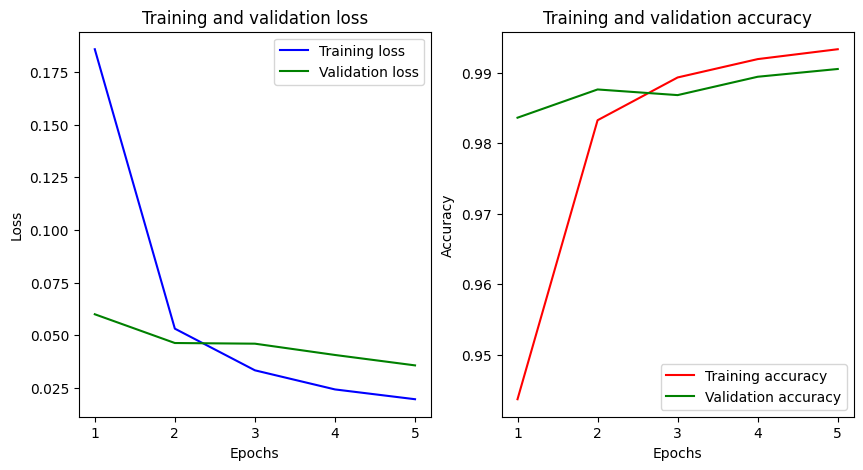

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluando resultados

In [10]:
results = convnet.evaluate(test_images, test_labels)
print('test loss:', results[0])
print('test accuracy:', results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.9849 - loss: 0.0414
test loss: 0.032069239765405655
test accuracy: 0.9891999959945679


### Resultados

In [11]:
pred = convnet.predict(test_images)
predictions = np.argmax(pred, 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step


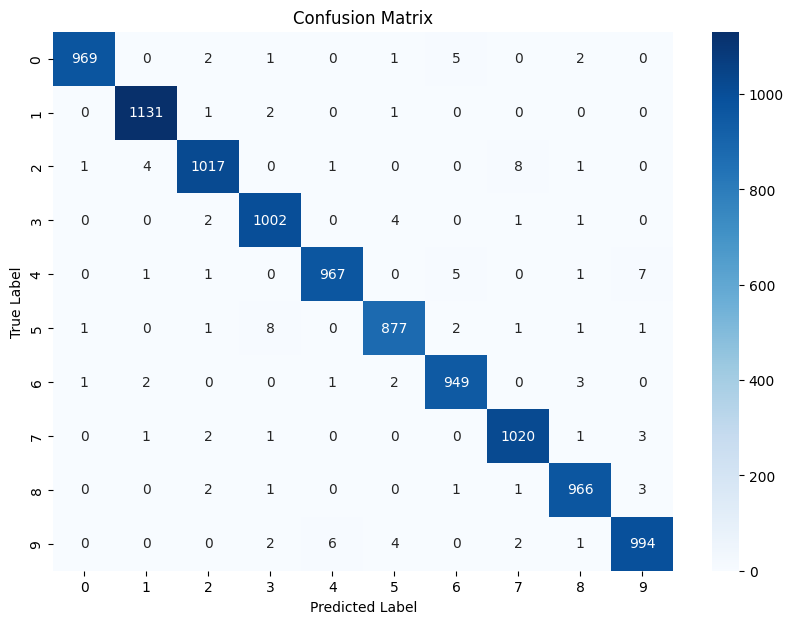

In [16]:
!pip install scikit-learn

# Convertir etiquetas verdaderas y predicciones en sus índices de clase
test_labs = np.argmax(test_labels, 1)
predictions = np.argmax(convnet.predict(test_images), 1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(test_labs, predictions)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
